In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [3]:
%store -r df_tmdb_movies
%store -r df_tmdb
%store -r df_tm_movies
%store -r dftop 
%store -r df
%store -r dfgen_bud

In [4]:
df_genres = pd.read_csv("genreIds")

# Question:  What are the most popular movie genres?


## For this question we used The Movie DB's API to gain insight.

The dataset that we used was from TheMovieDB movie database.  Shown below you can see that there is information about multiple movies spanning a few decades, the genre type they belong to, and then a column that gives us the popularity of the movie.  

In [5]:
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


**After researching this dataset a bit further, we found that popularity is based on a few different key aspects. This is explained in more detail on TheMovieDB's site here:   https://developers.themoviedb.org/3/getting-started/popularity**


- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favorite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

## Next we cleaned the data set to a point that is more useable for finding the most popular genres.


We dropped some columns and checked for null values. 
- this can be seen in more detail in the TMDB_Data_Cleaning notebook.


In [6]:
df_tm_movies.head()

,genre_ids,original_title,popularity,vote_average,vote_count
id,,,,,
12444,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788
10191,"[14, 12, 16, 10751]",How to Train Your Dragon,28.734,7.7,7610
10138,"[12, 28, 878]",Iron Man 2,28.515,6.8,12368
862,"[16, 35, 10751]",Toy Story,28.005,7.9,10174
27205,"[28, 878, 12]",Inception,27.920,8.3,22186


From here we dropped another column and set the index to title and also sorted by title.  We also renamed our genre column.

In [7]:
df_tmdb.head()

,popularity,vote_average,vote_count,genre_list
original_title,,,,
"""BLESSED""",0.600,7.0,1,"[99, 12]"
"""Legitimate Rape"" Pharmaceutical Ad",0.600,2.3,2,"[35, 80]"
"""cherry"" - Supreme",0.893,10.0,1,[99]
#1 Cheerleader Camp,3.277,3.6,34,"[35, 18]"
#ALLMYMOVIES,0.840,9.0,4,[99]


## From here we needed to pull the genre types out of the lists in the genre column.
- We did this by making each row an object and pulled those numbers out to their own individual columns in a new dataframe.
- We also created dataframes for our top most popular genres and our top grossing genres.
- This all can be seen in more detail in the TMDB_Data_Cleaning notebook.

We then combined those two dataframes and are ready to dive deeper!


In [8]:
 df.head()

,popularity,vote_average,vote_count,genre_list,genre_1,genre_2
original_title,,,,,,
"""BLESSED""",0.600,7.0,1,"[99, 12]",99,12
"""Legitimate Rape"" Pharmaceutical Ad",0.600,2.3,2,"[35, 80]",35,80
"""cherry"" - Supreme",0.893,10.0,1,[99],99,NaN
#1 Cheerleader Camp,3.277,3.6,34,"[35, 18]",35,18
#ALLMYMOVIES,0.840,9.0,4,[99],99,NaN


## Here is where it gets tricky!  
### As you can see, the genres are in ID form...so we were able to pull the genres that correspond to each unique identifier using TheMovieDB's API.
We compiled that into a dataframe to use with our current data.

In [9]:
df_genres

,Unnamed: 0,id,name
0,0,28,Action
1,1,12,Adventure
2,2,16,Animation
3,3,35,Comedy
4,4,80,Crime
5,5,99,Documentary
6,6,18,Drama
7,7,10751,Family
8,8,14,Fantasy
9,9,36,History


### We plotted our genres according to their popularity using a box plot that shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.  The diamond points outside of the distribution show the outliers for that particular genre.  This uses the inter-quartile range function.  

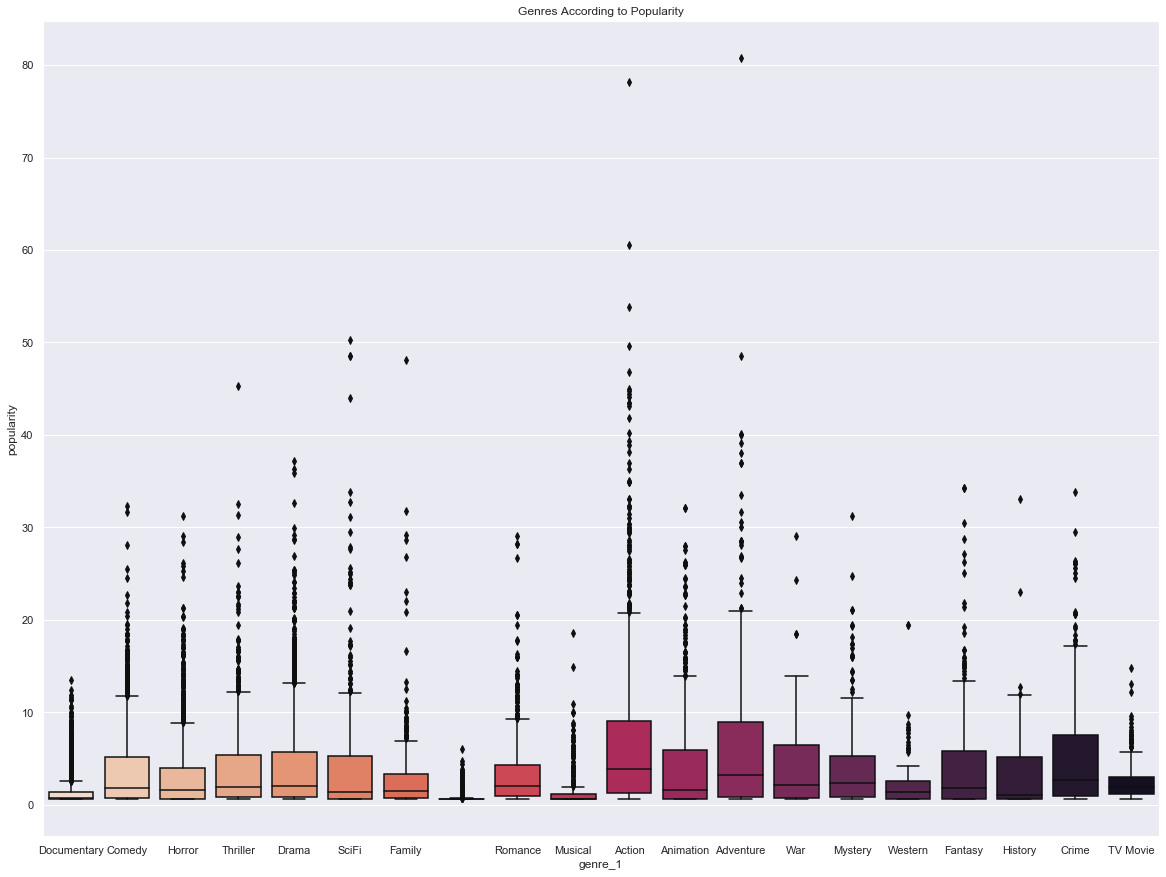

In [10]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(x="genre_1", y="popularity", data=df, palette='rocket_r', ax=ax)
ax.set_title('Genres According to Popularity')
ax.set_xticklabels(['Documentary',  'Comedy',  'Horror', 'Thriller', 'Drama', 'SciFi', 'Family', '', 'Romance', 'Musical','Action', 'Animation', 'Adventure', 'War', 'Mystery', 'Western', 'Fantasy', 'History', 'Crime', 'TV Movie'])


plt.show()

### We also plotted with a scatterplot to make sure our findings were true across all facets.

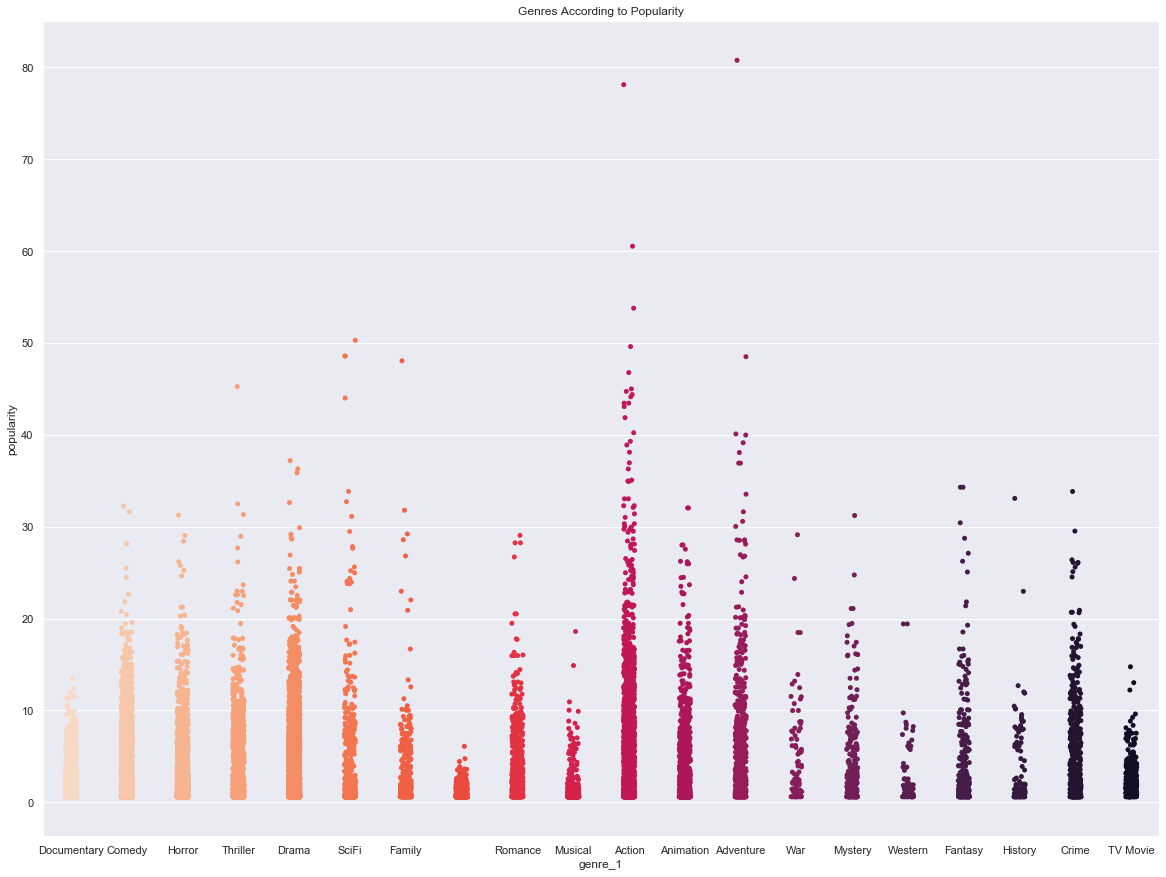

In [11]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.catplot(x="genre_1", y="popularity", data=df, palette='rocket_r', ax=ax)
ax.set_title('Genres According to Popularity')
ax.set_xticklabels(['Documentary',  'Comedy',  'Horror', 'Thriller', 'Drama', 'SciFi', 'Family', '', 'Romance', 'Musical','Action', 'Animation', 'Adventure', 'War', 'Mystery', 'Western', 'Fantasy', 'History', 'Crime', 'TV Movie'])

fig
plt.close(2)

### From here we see that our top genres are: 
(in no particular order)
 - Musicals
 - Romance
 - Animation
 - Drama
 - Horror
 - Action
 - Comedy
 - Thriller
 - Documentary

### So let's take a look further using  just those top genres.

Here we used a boxplot topped with a pointplot to best show the quantitative distribution of our top genres.   The pointplot shows the mean popularity across the genres.  
We compare that side by side to a scatter plot to ensure our data still reads correct across multiple platforms.

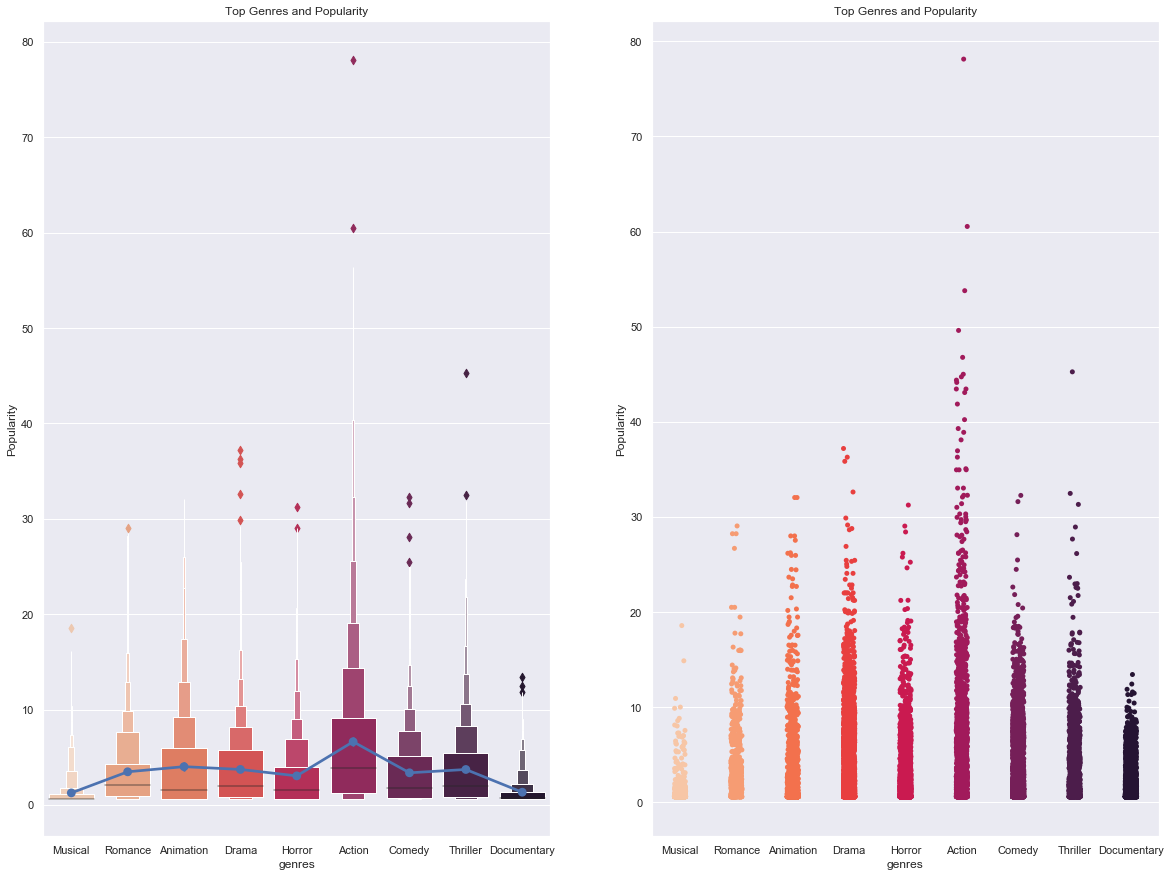

In [12]:
newfig = plt.figure(figsize = (20, 15))
ax = newfig.add_subplot(121)
ax2 = newfig.add_subplot(122)

ax.set_title('Top Genres and Popularity')
sns.catplot(x='genres', y = 'Popularity', kind = 'boxen', data = dftop, palette="rocket_r", ax=ax)
sns.pointplot(x='genres', y = 'Popularity', kind = 'boxen', data = dftop, ax=ax)
ax.set_xticklabels(['Musical','Romance','Animation','Drama', 'Horror', 'Action', 'Comedy', 'Thriller', 'Documentary'])

sns.catplot(x='genres', y = 'Popularity', palette="rocket_r", data = dftop, ax=ax2)
ax2.set_title('Top Genres and Popularity')
ax2.set_xticklabels(['Musical','Romance','Animation','Drama', 'Horror', 'Action', 'Comedy', 'Thriller', 'Documentary'])

fig
plt.close(2)
plt.close(3)

## We see that Action, Animation, Drama, Thrillers and Comedy seem to be very popular!!

## But what if we dove deeper and took a look our top grossing genres in terms of popularity?

### Our top grossing genres: 
(in no particular order)
 - Musicals
 - Animation
 - Adventure
 - Fantasy
 - Action
 - SciFi

Using the same plotting techniques we are able to see this:

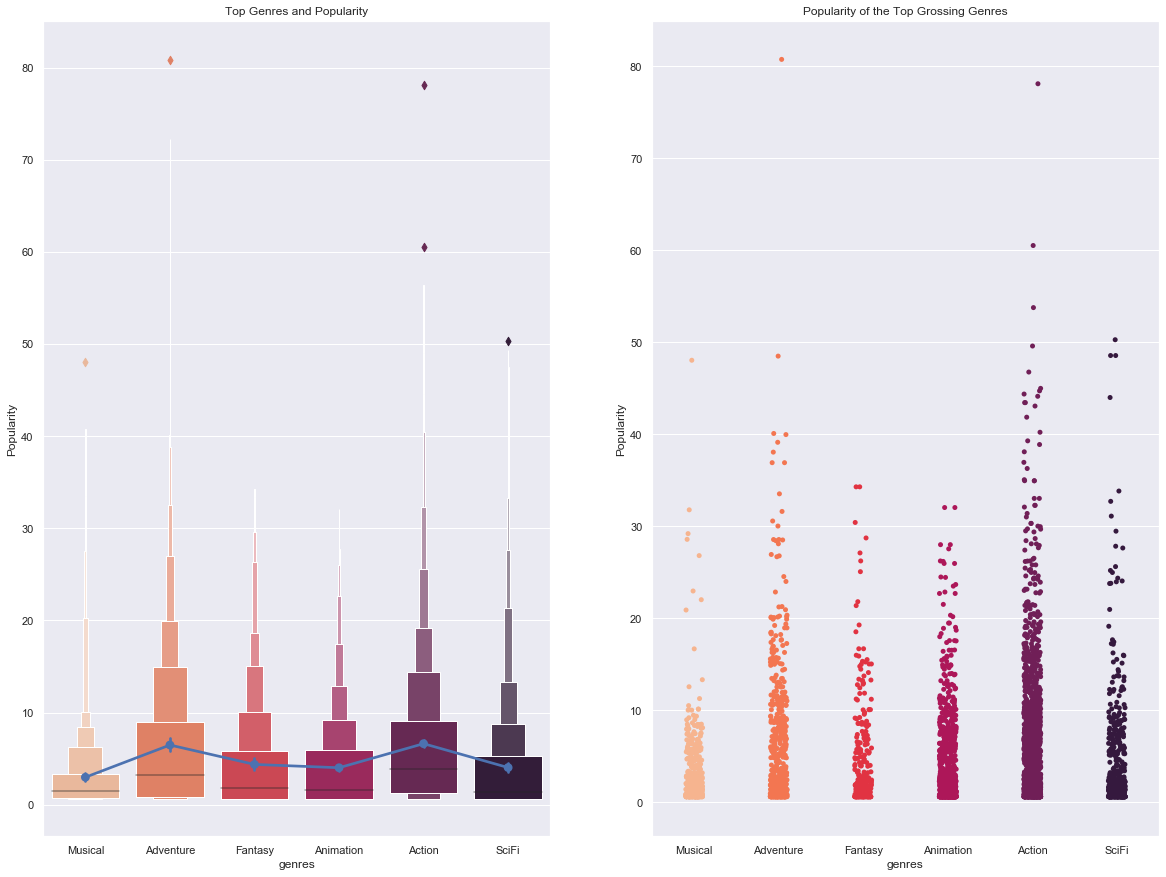

In [13]:
newfig = plt.figure(figsize = (20, 15))
ax = newfig.add_subplot(121)
ax2 = newfig.add_subplot(122)

ax.set_title('Top Genres and Popularity')
sns.catplot(x='genres', y = 'Popularity', kind = 'boxen', data = dfgen_bud, palette="rocket_r", ax=ax)

sns.pointplot(x='genres', y = 'Popularity', kind = 'boxen', data = dfgen_bud, ax=ax)
ax.set_xticklabels(['Musical','Adventure','Fantasy','Animation', 'Action', 'SciFi'])


sns.catplot(x='genres', y = 'Popularity', data = dfgen_bud, palette='rocket_r', ax=ax2)
ax2.set_title('Popularity of the Top Grossing Genres')
ax2.set_xticklabels(['Musical','Adventure','Fantasy','Animation', 'Action', 'SciFi'])

fig
plt.close(2)
plt.close(3)

# From here we decided that the Action, Animation and Musical genres seem to be highest based on gross and popularity.

### But let's look further into how we came up with gross!  And possibly look into the impact of crew size as well!!!